In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import torch

In [2]:
plot_dir = "./plots"

data_path = "/home/steffi/dev/master_thesis/hiding_adversarial_attacks/data/external"
mnist_path = os.path.join(data_path, "MNIST/processed")
fashion_mnist_path = os.path.join(data_path, "FashionMNIST/processed")
cifar10_path = os.path.join(data_path, "CIFAR10")

## DeepFool
adversarial_path = "/home/steffi/dev/master_thesis/hiding_adversarial_attacks/data/preprocessed/adversarial"
mnist_adv_path = os.path.join(adversarial_path, "data-set=MNIST--attack=DeepFool--eps=0.2--cp-run=HAA-946")
fashion_mnist_adv_path = os.path.join(adversarial_path, "data-set=FashionMNIST--attack=DeepFool--eps=0.105--cp-run=HAA-1728")
cifar10_adv_path = os.path.join(adversarial_path, "data-set=CIFAR10--attack=DeepFool--eps=0.1--cp-run=HAA-943")

In [3]:
fashion_mnist_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle \nboot",
}

cifar10_mapping = {
    0: "Airplane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}

# Load data

In [4]:
def load_images_and_labels(data_set_path: str, is_adv: bool = False):
    pt_files = ["training.pt", "test.pt"]
    if is_adv:
        pt_files = ["training_adv.pt", "test_adv.pt"]
    train_images, train_labels = torch.load(os.path.join(data_set_path, pt_files[0]))
    test_images, test_labels = torch.load(os.path.join(data_set_path, pt_files[1]))
    return train_images, train_labels, test_images, test_labels

In [5]:
def load_orig_images_and_labels(data_set_path: str):
    pt_files = ["training_orig.pt", "test_orig.pt"]
    train_images, train_labels = torch.load(os.path.join(data_set_path, pt_files[0]))
    test_images, test_labels = torch.load(os.path.join(data_set_path, pt_files[1]))
    return train_images, train_labels, test_images, test_labels

In [6]:
# Original, before attack
mnist_train_img, mnist_train_labels, mnist_test_img, mnist_test_labels = load_images_and_labels(mnist_path)
fashion_mnist_train_img, fashion_mnist_train_labels, fashion_mnist_test_img, fashion_mnist_test_labels = load_images_and_labels(fashion_mnist_path)
cifar10_train_img, cifar10_train_labels, cifar10_test_img, cifar10_test_labels = load_images_and_labels(cifar10_path)

In [7]:
# Original, after attack
mnist_train_img_orig, mnist_train_labels_orig, mnist_test_img_orig, mnist_test_labels_orig = load_orig_images_and_labels(mnist_adv_path)
fashion_mnist_train_img_orig, fashion_mnist_train_labels_orig, fashion_mnist_test_img_orig, fashion_mnist_test_labels_orig = load_orig_images_and_labels(fashion_mnist_adv_path)
cifar10_train_img_orig, cifar10_train_labels_orig, cifar10_test_img_orig, cifar10_test_labels_orig = load_orig_images_and_labels(cifar10_adv_path)

In [8]:
# Adversarial
mnist_train_img_adv, mnist_train_labels_adv, mnist_test_img_adv, mnist_test_labels_adv = load_images_and_labels(mnist_adv_path, is_adv=True)
fashion_mnist_train_img_adv, fashion_mnist_train_labels_adv, fashion_mnist_test_img_adv, fashion_mnist_test_labels_adv = load_images_and_labels(fashion_mnist_adv_path, is_adv=True)
cifar10_train_img_adv, cifar10_train_labels_adv, cifar10_test_img_adv, cifar10_test_labels_adv = load_images_and_labels(cifar10_adv_path, is_adv=True)

In [9]:
df_mnist_train_labels = pd.DataFrame(mnist_train_labels.numpy())
df_mnist_test_labels = pd.DataFrame(mnist_test_labels.numpy())

df_mnist_train_labels_orig = pd.DataFrame(mnist_train_labels_orig.numpy())
df_mnist_test_labels_orig = pd.DataFrame(mnist_test_labels_orig.numpy())

df_mnist_train_labels_adv = pd.DataFrame(mnist_train_labels_adv.numpy())
df_mnist_test_labels_adv = pd.DataFrame(mnist_test_labels_adv.numpy())

df_fashion_mnist_train_labels = pd.DataFrame(fashion_mnist_train_labels.numpy())
df_fashion_mnist_test_labels = pd.DataFrame(fashion_mnist_test_labels.numpy())

df_fashion_mnist_train_labels_orig = pd.DataFrame(fashion_mnist_train_labels_orig.numpy())
df_fashion_mnist_test_labels_orig = pd.DataFrame(fashion_mnist_test_labels_orig.numpy())

df_fashion_mnist_train_labels_adv = pd.DataFrame(fashion_mnist_train_labels_adv.numpy())
df_fashion_mnist_test_labels_adv = pd.DataFrame(fashion_mnist_test_labels_adv.numpy())

df_cifar10_train_labels = pd.DataFrame(cifar10_train_labels.numpy())
df_cifar10_test_labels = pd.DataFrame(cifar10_test_labels.numpy())

df_cifar10_train_labels_orig = pd.DataFrame(cifar10_train_labels_orig.numpy())
df_cifar10_test_labels_orig = pd.DataFrame(cifar10_test_labels_orig.numpy())

df_cifar10_train_labels_adv = pd.DataFrame(cifar10_train_labels_adv.numpy())
df_cifar10_test_labels_adv = pd.DataFrame(cifar10_test_labels_adv.numpy())

# Q1: How is the distribution of classes in the data sets?

In [10]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

In [11]:
bupu_cm = sns.color_palette("BuPu_r", 10)

In [12]:
bupu_cm

[(0.44910419069588614, 0.04244521337946944, 0.4327720107650903),
 (0.5180469050365244, 0.14571318723567858, 0.5436216839677047),
 (0.5359169550173011, 0.2820299884659746, 0.6286043829296425),
 (0.5477277970011535, 0.40604382929642446, 0.6876585928489043),
 (0.5490196078431373, 0.5273971549404075, 0.7467589388696655),
 (0.574486735870819, 0.641999231064975, 0.8047673971549404),
 (0.6302652825836217, 0.7446828143021915, 0.8587773933102653),
 (0.7277047289504037, 0.8125951557093425, 0.8942099192618224),
 (0.8210841983852364, 0.8820453671664744, 0.9325336409073434),
 (0.9035447904652056, 0.942960399846213, 0.9666897347174164)]

In [13]:
def get_bins(ticks_count):
    return np.arange(0, ticks_count + 1)-0.5

In [14]:
def plot_label_histogram(df_labels, title, bins, xticks, xticklabels, color):
    ax = sns.histplot(df_labels, legend=None, bins=bins, palette=color)
    ax.set_title(title)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

In [15]:
def plot_label_bar(df_labels, title, bins, xticks, xticklabels, color):
    fig, ax = plt.subplots(1,1, figsize=(8,6))
    ax = df_labels.plot.hist(edgecolor='black', linewidth=1, color=color, ax=ax,  align='mid')
    ax.set_title(title)
    bins_labels(xticks)
    #ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.get_legend().remove()

In [16]:
def plot_label_bars(dfs, titles, bins, xticks, xticklabels_list, colors):
    fig, axs = plt.subplots(2,2, figsize=(12,10), sharex="col", sharey="row")
    for df, color, title, ax, xticklabels in zip(dfs, colors, titles, axs.reshape(-1), xticklabels_list):
        ax = df.plot.hist(edgecolor='black', linewidth=1, color=color, ax=ax, bins=bins,  align='mid')
        ax.set_title(title)
        ax.set_xticks(xticks)
        #ax.set_xticklabels(xticklabels)
        ax.set_xticklabels(xticklabels, rotation=-45, ha="center", fontsize=14)
        ax.get_legend().remove()
        #plt.xticks(rotation=-38)

## Adversarial label distribution

In [17]:
dfs = [df_fashion_mnist_train_labels_adv, df_cifar10_train_labels_adv, df_fashion_mnist_test_labels_adv, df_cifar10_test_labels_adv]
titles = ["Fashion-MNIST train", "CIFAR-10 train","Fashion-MNIST test", "CIFAR-10 test" ]
colors = [bupu_cm[0], purd_cm[1], bupu_cm[4], purd_cm[6]]
xticklabels_list = [fashion_mnist_mapping.values(), cifar10_mapping.values(), fashion_mnist_mapping.values(), cifar10_mapping.values()]

NameError: name 'purd_cm' is not defined

In [ ]:
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks

In [ ]:
plot_label_bars(dfs, titles, bins, xticks, xticklabels_list, colors)
plt.suptitle("Adversarial label distributions", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "adversarial_label_distributions_all.png"), transparent=True)

# Distribution of original labels left after the attack
Not all original images could be attacked.

In [ ]:
dfs = [df_fashion_mnist_train_labels_orig, df_cifar10_train_labels_orig, df_fashion_mnist_test_labels_orig, df_cifar10_test_labels_orig]
titles = ["Fashion-MNIST train", "CIFAR-10 train","Fashion-MNIST test", "CIFAR-10 test" ]
colors = [bupu_cm[0], purd_cm[1], bupu_cm[4], purd_cm[6]]
xticklabels_list = [fashion_mnist_mapping.values(), cifar10_mapping.values(), fashion_mnist_mapping.values(), cifar10_mapping.values()]

In [ ]:
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks

In [ ]:
plot_label_bars(dfs, titles, bins, xticks, xticklabels_list, colors)
plt.suptitle("Original label distributions after attack", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "original_label_distributions_after_attack_all.png"), transparent=True)

## Fashion-MNIST

In [ ]:
title = "FashionMNIST training set original label distribution after attack"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_bar(df_fashion_mnist_train_labels_orig, title, bins, xticks, xticklabels, bupu_cm[0])
plt.xticks(rotation=-38)

In [ ]:
title = "FashionMNIST test set original label distribution after attack"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_bar(df_fashion_mnist_test_labels_orig, title, bins, xticks, xticklabels, bupu_cm[4])
plt.xticks(rotation=-38)

## MNIST

### Original

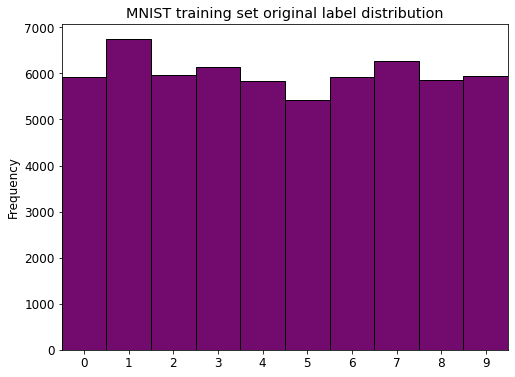

In [98]:
title = "MNIST training set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_bar(df_mnist_train_labels, title, bins, xticks, xticklabels, bupu_cm[0])

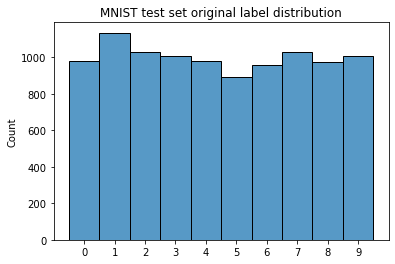

In [11]:
title = "MNIST test set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_test_labels, title, bins, xticks, xticklabels)

### Adversarial

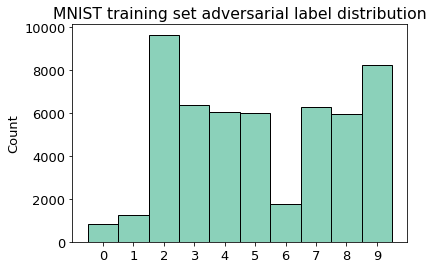

In [329]:
title = "MNIST training set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_train_labels_adv, title, bins, xticks, xticklabels, "BuGn")

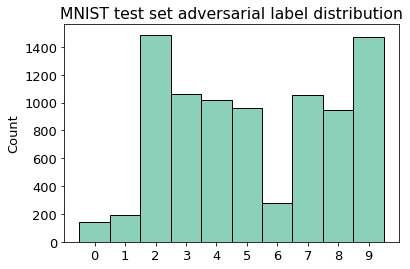

In [330]:
title = "MNIST test set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_test_labels_adv, title, bins, xticks, xticklabels, "BuGn")

### Findings MNIST
* Very few samples were turned into 0, 1 and 6
* Many samples were turned into 2 and 9

## FashionMNIST

## Labels mappings:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

### Original

(array([0.45, 1.35, 2.25, 3.15, 4.05, 4.95, 5.85, 6.75, 7.65, 8.55]),
 [Text(0.45, 0, 'T-shirt/top'),
  Text(1.35, 0, 'Trouser'),
  Text(2.2500000000000004, 0, 'Pullover'),
  Text(3.1500000000000004, 0, 'Dress'),
  Text(4.050000000000001, 0, 'Coat'),
  Text(4.950000000000001, 0, 'Sandal'),
  Text(5.8500000000000005, 0, 'Shirt'),
  Text(6.750000000000001, 0, 'Sneaker'),
  Text(7.650000000000001, 0, 'Bag'),
  Text(8.55, 0, 'Ankle boot')])

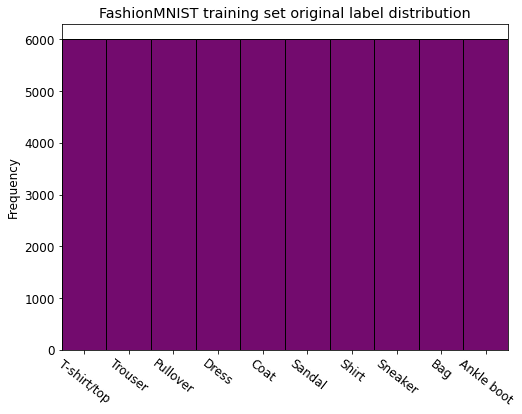

In [99]:
title = "FashionMNIST training set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_bar(df_fashion_mnist_train_labels, title, bins, xticks, xticklabels, bupu_cm[0])
plt.xticks(rotation=-38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

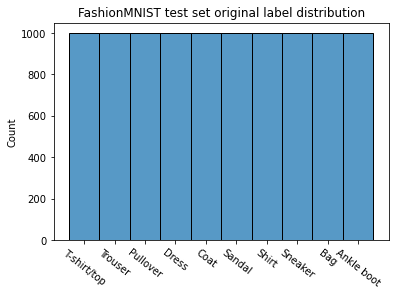

In [15]:
title = "FashionMNIST test set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_histogram(df_fashion_mnist_test_labels, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

### Adversarial

In [102]:
plt.rcParams.update({'font.size': 13})

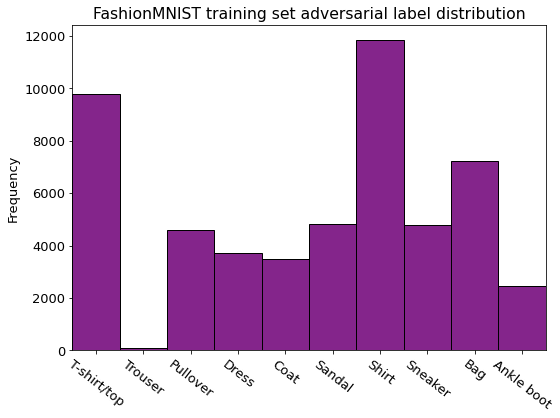

In [103]:
title = "FashionMNIST training set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_bar(df_fashion_mnist_train_labels_adv, title, bins, xticks, xticklabels, bupu_cm[1])
plt.xticks(rotation=-38)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "fashion_mnist_train_adv_label_distribution.png"), transparent=True)

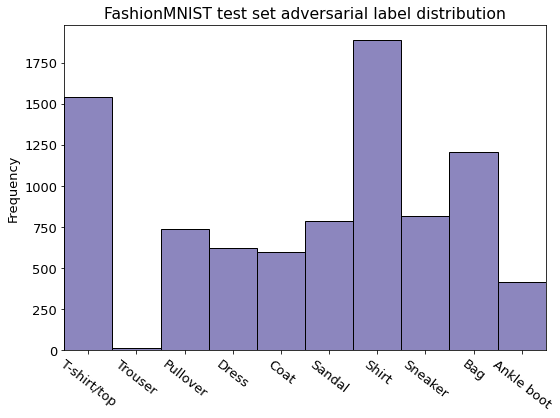

In [104]:
title = "FashionMNIST test set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_bar(df_fashion_mnist_test_labels_adv, title, bins, xticks, xticklabels, bupu_cm[4])
plt.xticks(rotation=-38)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "fashion_mnist_test_adv_label_distribution.png"), transparent=True)

### Findings FashionMNIST
* Almost nothing was turned into trousers (label=1)
* Many samples were turned into T-shirts/tops (label=0), Shirts (label=6) and Bags (label=8)

## CIFAR10

In [31]:
purd_cm = sns.color_palette("PuRd_r", 10)

In [32]:
purd_cm

[(0.5425759323337178, 0.0, 0.22343713956170702),
 (0.689919261822376, 0.03128027681660899, 0.29576316801230296),
 (0.8239907727797001, 0.08544405997693195, 0.3708419838523645),
 (0.8978085351787773, 0.15335640138408305, 0.5243829296424452),
 (0.8858285274894272, 0.3111880046136101, 0.6364321414840446),
 (0.8433833141099577, 0.4625759323337178, 0.7227374086889657),
 (0.7917877739331026, 0.5923414071510957, 0.7865282583621684),
 (0.8242675893886967, 0.7015916955017301, 0.8426297577854671),
 (0.8728642829680893, 0.8128412149173394, 0.9007612456747405),
 (0.9233525567089581, 0.9030988081507113, 0.9481737793156478)]

Label mappings:
* 0	Airplane
* 1	Car
* 2	Bird
* 3	Cat
* 4	Deer
* 5	Dog
* 6	Frog
* 7	Horse
* 8	Ship
* 9	Truck

### Original

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Airplane'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Bird'),
  Text(3, 0, 'Cat'),
  Text(4, 0, 'Deer'),
  Text(5, 0, 'Dog'),
  Text(6, 0, 'Frog'),
  Text(7, 0, 'Horse'),
  Text(8, 0, 'Ship'),
  Text(9, 0, 'Truck')])

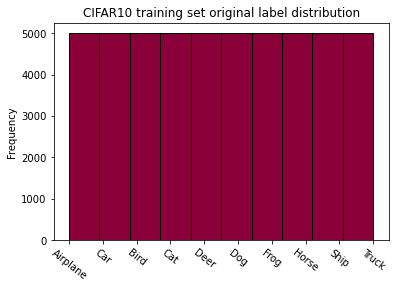

In [34]:
title = "CIFAR10 training set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=cifar10_mapping.values()
plot_label_bar(df_cifar10_train_labels, title, bins, xticks, xticklabels, purd_cm[0])
plt.xticks(rotation=-38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Airplane'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Bird'),
  Text(3, 0, 'Cat'),
  Text(4, 0, 'Deer'),
  Text(5, 0, 'Dog'),
  Text(6, 0, 'Frog'),
  Text(7, 0, 'Horse'),
  Text(8, 0, 'Ship'),
  Text(9, 0, 'Truck')])

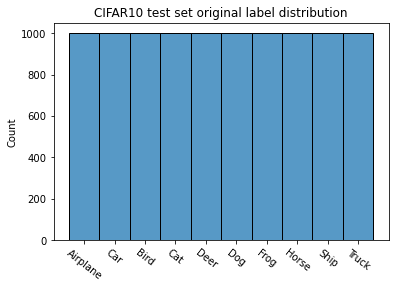

In [19]:
title = "CIFAR10 test set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=cifar10_mapping.values()
plot_label_histogram(df_cifar10_test_labels, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

### Adversarial

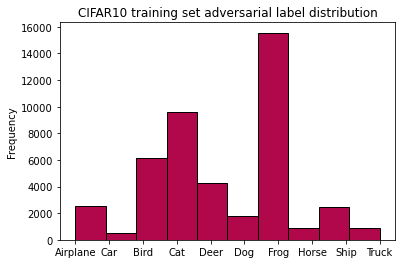

In [40]:
title = "CIFAR10 training set adversarial label distribution"
bins=get_bins(len(cifar10_mapping.values()))
xticks=range(0, len(cifar10_mapping.values()))
xticklabels=cifar10_mapping.values()
plot_label_bar(df_cifar10_train_labels_adv, title, bins, xticks, xticklabels, purd_cm[1])

In [21]:
3000 / len(df_cifar10_test_labels_adv )

0.3563791874554526

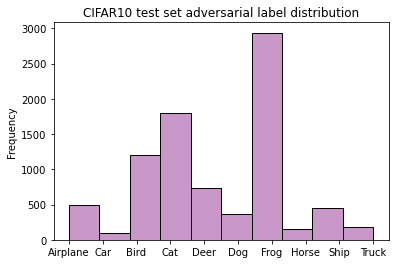

In [39]:
title = "CIFAR10 test set adversarial label distribution"
bins=get_bins(len(cifar10_mapping.values()))
xticks=range(0, len(cifar10_mapping.values()))
xticklabels=cifar10_mapping.values()
plot_label_bar(df_cifar10_test_labels_adv, title, bins, xticks, xticklabels, purd_cm[6])

### FIndings CIFAR10
* Almost no samples were turned into Car (label=1), Horse (label=7) and Truck (label=9)
* A large fraction of samples (35.6%)  were turned into Frog (label=6)

# Q2: Which orig_labels were turned into which adv_labels?

In [18]:
mnist_train_images_orig, mnist_train_labels_orig = torch.load(os.path.join(mnist_adv_path, "training_orig.pt"))
mnist_test_images_orig, mnist_test_labels_orig = torch.load(os.path.join(mnist_adv_path, "test_orig.pt"))

In [19]:
fashion_mnist_train_images_orig, fashion_mnist_train_labels_orig = torch.load(os.path.join(fashion_mnist_adv_path, "training_orig.pt"))
fashion_mnist_test_images_orig, fashion_mnist_test_labels_orig = torch.load(os.path.join(fashion_mnist_adv_path, "test_orig.pt"))

In [20]:
cifar10_train_images_orig, cifar10_train_labels_orig = torch.load(os.path.join(cifar10_adv_path, "training_orig.pt"))
cifar10_est_images_orig, cifar10_test_labels_orig = torch.load(os.path.join(cifar10_adv_path, "test_orig.pt"))

In [22]:
def plot_orig_to_adv_heatmap(orig: torch.Tensor, adv: torch.Tensor, title: str = None, ticklabels = None, cmap="RdPu"):
    assert len(orig) == len(adv)
    df_orig_to_adv = pd.DataFrame([orig.numpy(), adv.numpy(), np.ones(len(adv))], index=["orig_label", "adv_label", "count"]).T
    df = df_orig_to_adv.groupby(["orig_label", "adv_label"]).count().reset_index().pivot(columns='adv_label',index='orig_label',values='count').fillna(0)
    fig = plt.figure(figsize=(10, 7))
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
    ax = sns.heatmap(df, annot=True, fmt=".0f", cmap=cmap)
    if title is not None:
        plt.title(title)
    if ticklabels is not None:
        ax.set_xticklabels(ticklabels)
        ax.set_yticklabels(ticklabels)
        ax.yaxis.set_tick_params(rotation=0)

In [167]:
def plot_orig_to_adv_heatmaps(origs: torch.Tensor, advs: torch.Tensor, titles: str = None, ticklabels_list = None, cmap="RdPu"):
    assert len(origs) == len(advs)
    fig, axs = plt.subplots(2,2, figsize=(14,10), sharex="col", sharey="col")
    for i, (orig, adv, title, ax, ticklabels) in enumerate(zip(origs, advs, titles, axs.reshape(-1), ticklabels_list)):
        df_orig_to_adv = pd.DataFrame([orig.numpy(), adv.numpy(), np.ones(len(adv))], index=["orig_label", "adv_label", "count"]).T
        df = df_orig_to_adv.groupby(["orig_label", "adv_label"]).count().reset_index().pivot(columns='adv_label',index='orig_label',values='count').fillna(0)
        ax = sns.heatmap(df, annot=True, fmt=".0f", cmap=cmap, ax=ax)
        if title is not None:
            ax.set_title(title, fontsize=15)
        if ticklabels is not None:
            ax.set_xticklabels(ticklabels, fontsize=14)
            ax.set_yticklabels(ticklabels, fontsize=14)
            ax.xaxis.set_tick_params(rotation=-90)
            ax.yaxis.set_tick_params(rotation=0)
        ax.set_ylabel("Original label", fontsize=14)
        if i >=2:
            ax.tick_params(axis='both', which='major', labelsize=13)
            ax.set_xlabel("Adversarial label", fontsize=14)            
        else:
            ax.xaxis.set_ticks_position('none') 
            ax.set_xlabel("")
    axs[0, 1].xaxis.labelpad = -55

In [168]:
origs = [fashion_mnist_train_labels_orig, cifar10_train_labels_orig , fashion_mnist_test_labels_orig, cifar10_test_labels_orig]
advs = [fashion_mnist_train_labels_adv, cifar10_train_labels_adv,fashion_mnist_test_labels_adv, cifar10_test_labels_adv]
titles = ["Fashion-MNIST train", "CIFAR-10 train", "Fashion-MNIST test", "CIFAR-10 test"]
ticklabels_list = [fashion_mnist_mapping.values(), cifar10_mapping.values(), fashion_mnist_mapping.values(), cifar10_mapping.values()]

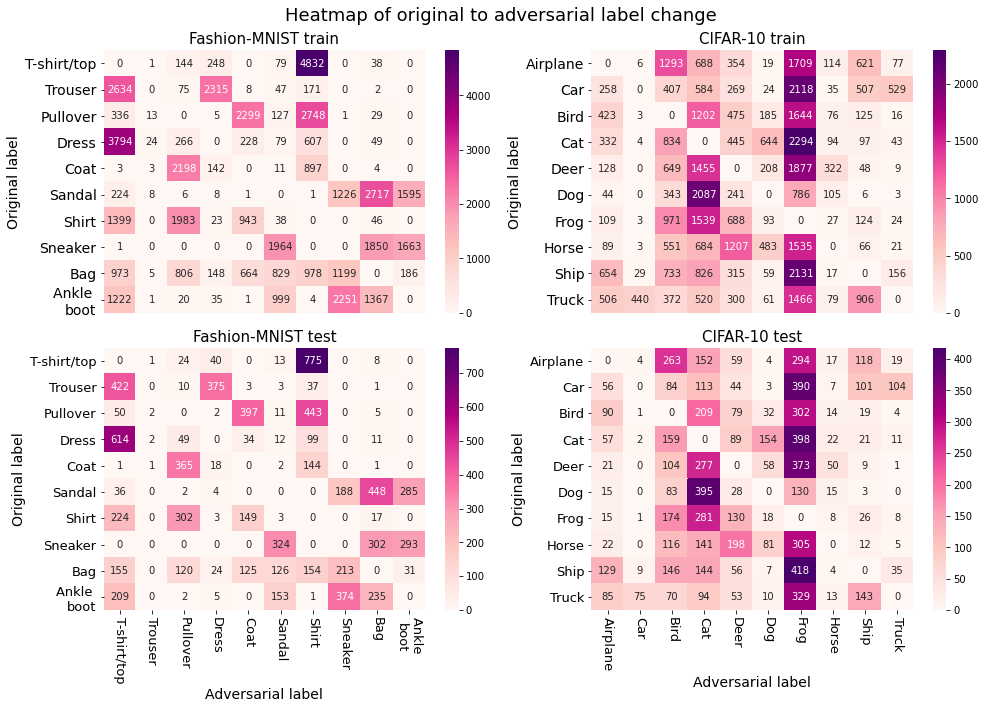

In [170]:
plot_orig_to_adv_heatmaps(origs, advs, titles, ticklabels_list)
plt.suptitle("Heatmap of original to adversarial label change", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "orig_to_adversarial_labels_post_attack.png"), transparent=True)

# Original to adversarial label heatmaps

## MNIST 

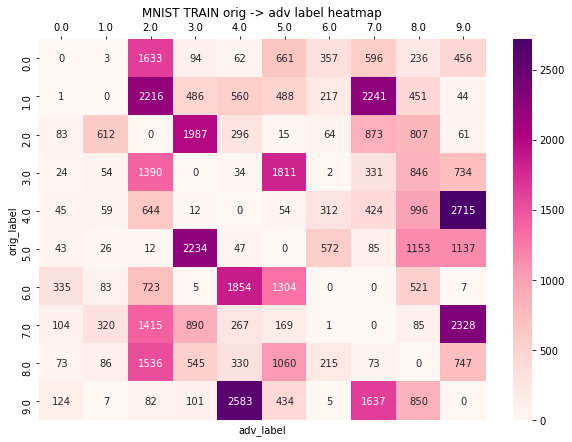

In [23]:
plot_orig_to_adv_heatmap(mnist_train_labels_orig, mnist_train_labels_adv, title="MNIST TRAIN orig -> adv label heatmap")

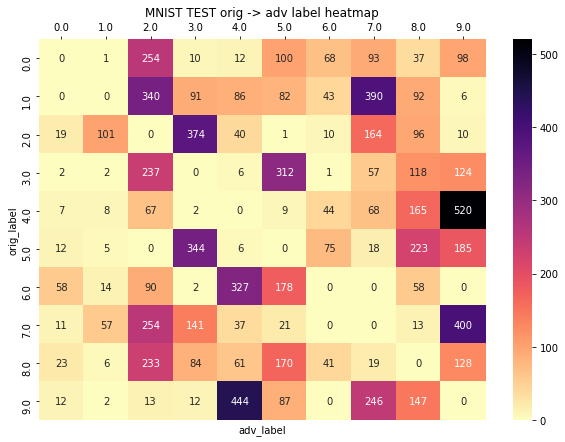

In [32]:
plot_orig_to_adv_heatmap(mnist_test_labels_orig, mnist_test_labels_adv, title="MNIST TEST orig -> adv label heatmap", cmap="magma_r")

## FashionMNIST

Labels mappings:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

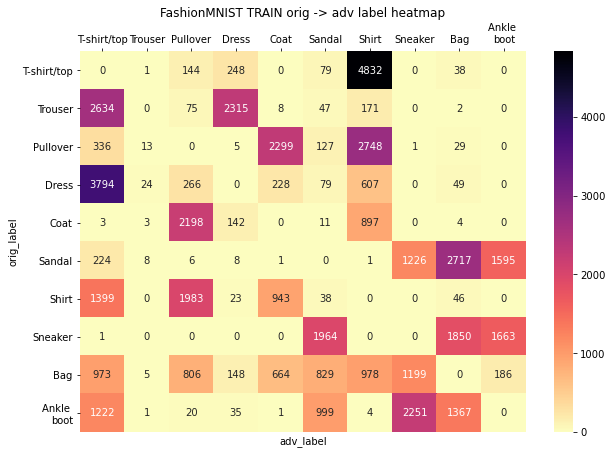

In [33]:
plot_orig_to_adv_heatmap(fashion_mnist_train_labels_orig, fashion_mnist_train_labels_adv, title="FashionMNIST TRAIN orig -> adv label heatmap", ticklabels=list(fashion_mnist_mapping.values()), cmap="magma_r")

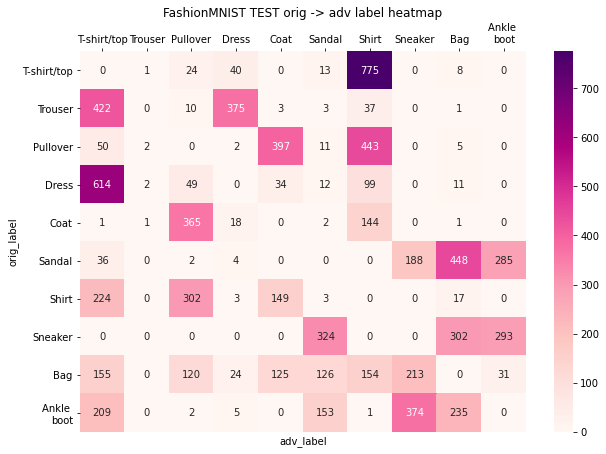

In [34]:
plot_orig_to_adv_heatmap(fashion_mnist_test_labels_orig, fashion_mnist_test_labels_adv, title="FashionMNIST TEST orig -> adv label heatmap", ticklabels=list(fashion_mnist_mapping.values()))

## FashionMNIST findings
* 0 T-Shirt => Shirt 
* 1 Trouser => T-Shirt (0) or Dress (3)
* 2 Pullover => Shirt (6) or Coat (4)
* 3 Dress => T-Shirt (0)
* 4 Coat => Pullover (2) or Shirt (6)
* 5 Sandal => Bag (8)
* 6 Shirt => Coat (4) or Pullover (2) or T-Shirt (0)
* 7 Sneaker => Sandal (5) or Ankle Boot (9)
* 8 Bag => Shirt (6) or T-Shirt (0)
* 9 Ankle Boot => Sneaker (7) or Sandal (5) or Bag (8)

## CIFAR10

Label mappings:
* 0	Airplane
* 1	Car
* 2	Bird
* 3	Cat
* 4	Deer
* 5	Dog
* 6	Frog
* 7	Horse
* 8	Ship
* 9	Truck

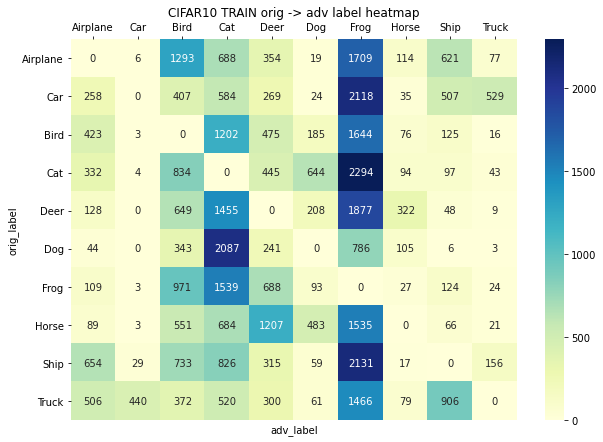

In [31]:
plot_orig_to_adv_heatmap(cifar10_train_labels_orig, cifar10_train_labels_adv, title="CIFAR10 TRAIN orig -> adv label heatmap", ticklabels=list(cifar10_mapping.values()))

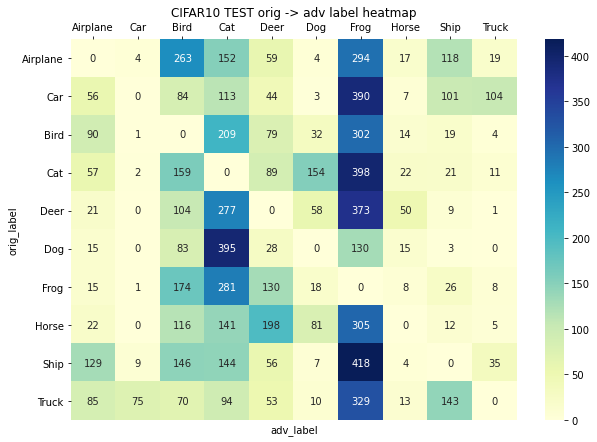

In [32]:
plot_orig_to_adv_heatmap(cifar10_test_labels_orig, cifar10_test_labels_adv, title="CIFAR10 TEST orig -> adv label heatmap", ticklabels=list(cifar10_mapping.values()))